In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing# Get column names first
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Importing CSV

In [44]:
xtrain = pd.read_csv('x_train.csv')
xtest = pd.read_csv('x_test.csv')
ytrain = pd.read_csv('y_train.csv')
print(xtrain.columns)


Index(['Index', 'login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee'],
      dtype='object')


In [3]:
xtrain.head()

,Index,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1.000000,0,V,NOT,1,O,1,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,1,3877,2014,1.000000,0,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,2,4942,2013,1.000000,1,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,3,13428,2013,0.246575,0,NOT,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,4,17137,2015,1.000000,0,V,NOT,2,O,1,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340


Total Data

In [45]:
xtrain.drop('Index', axis = 1, inplace = True)
print("Total size of train data:",xtrain.shape[0])
print("Total size of test data:",xtest.shape[0])
print("Total size of dataset:",xtrain.shape[0]+xtest.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


In [46]:
train = pd.merge(left = xtrain, right = ytrain, how = 'left')
backUpTrain = train
train.drop('Index', axis = 1, inplace = True)
print(train.describe())
train.head()

              login    ft_2_categ          EXPO    ft_4_categ   ft_19_categ  \
count  10229.000000  10229.000000  10229.000000  10229.000000  10229.000000   
mean    9969.220745   2013.646789      0.913672      0.281064      1.938508   
std     5619.328018      1.380660      0.233806      0.449540      0.240242   
min        0.000000   2012.000000      0.000000      0.000000      1.000000   
25%     5198.000000   2012.000000      1.000000      0.000000      2.000000   
50%     9820.000000   2013.000000      1.000000      0.000000      2.000000   
75%    14922.000000   2015.000000      1.000000      1.000000      2.000000   
max    19995.000000   2016.000000      1.000000      1.000000      2.000000   

        superficief   ft_21_categ  ft_22_categ        TARGET  
count  10110.000000  10229.000000  8993.000000  10229.000000  
mean    1818.152918      2.238049  1965.061715      0.227002  
std     2272.111284      0.961589    33.548619      0.418914  
min        1.000000      1.000000  1

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0


Drop Duplicates

In [6]:
train.drop_duplicates()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [7]:
nullData = train.isnull().sum()
nullData

login             0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
TARGET            0
dtype: int64

In [9]:
print(train['ft_2_categ'].describe())

count    10229.000000
mean      2013.646789
std          1.380660
min       2012.000000
25%       2012.000000
50%       2013.000000
75%       2015.000000
max       2016.000000
Name: ft_2_categ, dtype: float64


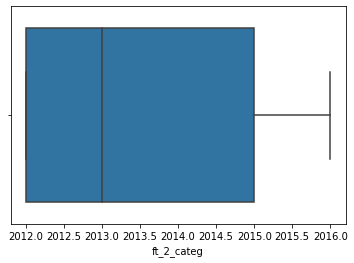

In [10]:
sns.boxplot(x = xtrain['ft_2_categ'])

In [11]:
train['EXPO'].describe()

count    10229.000000
mean         0.913672
std          0.233806
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: EXPO, dtype: float64

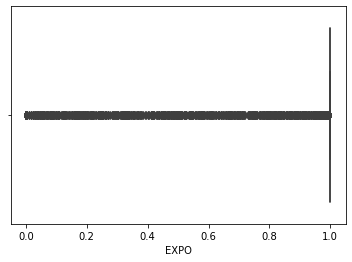

In [8]:
sns.boxplot(x = xtrain['EXPO'])

In [13]:
#train.drop(['login'], axis = 1)
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [14]:
train['ft_2_categ'].describe()

count    10229.000000
mean      2013.646789
std          1.380660
min       2012.000000
25%       2012.000000
50%       2013.000000
75%       2015.000000
max       2016.000000
Name: ft_2_categ, dtype: float64

In [39]:
train['Difference'] = train['ft_2_categ'] - train['ft_22_categ']
train['Difference'].describe()
train['Difference'].where(train['Difference'] < 0)
nullData = train.isnull().sum()
nullData

login              0
ft_2_categ         0
EXPO           10229
ft_4_categ         0
ft_5_categ         0
ft_6_categ         0
ft_7_categ         0
ft_8_categ         0
ft_9_categ         0
ft_10_categ        0
ft_11_categ        0
ft_12_categ        0
ft_13_categ        0
ft_14_categ        0
ft_15_categ        0
ft_16_categ        0
ft_17_categ        0
ft_18_categ        0
ft_19_categ        0
superficief      119
ft_21_categ        0
ft_22_categ     1236
ft_23_categ        0
ft_24_categ        0
Insee            115
TARGET             0
Difference      1236
dtype: int64

In [47]:
trainBackup = train
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [55]:
train0 = train[train.EXPO == 0]
train0 = train0[train0.TARGET == 1]
train0['EXPO'] = None
train0
for i in train0.login:
    train = train[train.login != i]
#    if train['login'] == i:
#        train.EXPO = None
        

train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,V,N,2,O,1,O,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [17]:
(train.Difference == 0).sum()
train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10224,2710,2012,1.000000,0,V,V,V,V,V,V,...,base,2,550.0,2,1960.0,0,0,76217,0,52.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN
10227,5319,2015,1.000000,0,N,V,V,V,V,V,...,base,2,1754.0,3,1960.0,0,0,64445,0,55.0


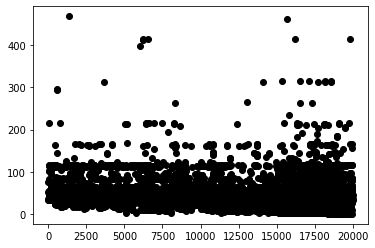

In [18]:
plt.plot(train['login'], train['Difference'], 'o', color='black');


In [19]:
train.drop(['login'], axis = 1)

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,2014,1.000000,0,V,NOT,1,O,1,O,NOT,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,2014,1.000000,0,V,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,2013,1.000000,1,V,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,2013,0.246575,0,NOT,V,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,2015,1.000000,0,V,NOT,2,O,1,O,NOT,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,2016,0.997268,0,V,N,1,O,1,O,N,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10224,2012,1.000000,0,V,V,V,V,V,V,V,...,base,2,550.0,2,1960.0,0,0,76217,0,52.0
10226,2015,0.246575,0,V,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN
10227,2015,1.000000,0,N,V,V,V,V,V,V,...,base,2,1754.0,3,1960.0,0,0,64445,0,55.0


In [20]:
train['ft_22_categ'].describe()

count    8907.000000
mean     1965.063995
std        33.565923
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [21]:
backUp1 = train
train[(train.ft_22_categ == 2000)]
count = train['ft_22_categ'].value_counts()
print(count.describe())
print(count)

count     139.000000
mean       64.079137
std       273.660110
min         1.000000
25%         2.000000
50%        10.000000
75%        28.500000
max      2616.000000
Name: ft_22_categ, dtype: float64
1960.0    2616
1980.0    1694
1988.0     790
1900.0     426
1970.0     336
          ... 
1923.0       1
1939.0       1
1854.0       1
1946.0       1
1550.0       1
Name: ft_22_categ, Length: 139, dtype: int64


In [22]:
count = pd.DataFrame(count) 
#count.describe()
(count[count['ft_22_categ'] > 28])
#train = train[train.ft_22_categ != 1960]
#train = train[train.ft_22_categ != 1980]
#train = train[train.ft_22_categ != 1988]
#train = train[train.ft_22_categ != 1900]
#train = train[train.ft_22_categ != 1970]
#train = train[train.ft_22_categ != 1950]
#train = train[train.ft_22_categ != 1930]
#train = train[train.ft_22_categ != 1920]
#train = train[train.ft_22_categ != 1990]
#train = train[train.ft_22_categ != 1960]
#train = train[train.ft_22_categ != 1975]
#train = train[train.ft_22_categ != 1940]
#train = train[train.ft_22_categ != 1965]
#train = train[train.ft_22_categ != 1850]
#train = train[train.ft_22_categ != 1910]
#temp = train[train.ft_22_categ == 1960]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
 #   train = train[train.login != i]

#train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [23]:
#temp = train[train.ft_22_categ == 1980]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
#    train = train[train.login != i]

#train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [24]:
#temp = train[train.ft_22_categ == 1988]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
 #   train = train[train.login != i]

#train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [25]:
#temp = train[train.ft_22_categ == 1990]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
 #   train = train[train.login != i]

#train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [26]:
#temp = train[train.ft_22_categ == 1900]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
#    train = train[train.login != i]

#train    

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [27]:
#temp = train[train.ft_22_categ == 1970]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
#    train = train[train.login != i]

#train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [28]:
#temp = train[train.ft_22_categ == 1950]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
 #   train = train[train.login != i]

#train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [29]:
#temp = train[train.ft_22_categ == 1930]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
#    train = train[train.login != i]

#train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [30]:
#temp = train[train.ft_22_categ == 1920]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
 #   train = train[train.login != i]

#train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


In [31]:
#temp = train[train.ft_22_categ == 1960]
#temp = temp[temp.TARGET == 0]
#for i in temp.login:
#    train = train[train.login != i]

#train

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,based,2,1351.0,4,2012.0,0,2,65440,0,2.0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,based,2,1972.0,2,1980.0,0,0,14341,1,34.0
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,based,2,1630.0,4,NaN,0,0,75109,0,NaN
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,based,2,532.0,3,NaN,0,0,92004,0,NaN
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,based,2,1050.0,2,1972.0,0,4,59340,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,3965,2013,1.000000,0,V,N,3,O,1,O,...,base,2,2178.0,1,1960.0,0,4,36044,1,53.0
10222,2526,2012,1.000000,0,V,N,2,O,1,O,...,pi,2,625.0,4,1968.0,0.6,3,6138,0,44.0
10223,1605,2016,0.997268,0,V,N,1,O,1,O,...,effpi,2,2417.0,1,1993.0,0,4,73094,0,23.0
10226,8499,2015,0.246575,0,V,V,V,V,V,V,...,base,2,750.0,4,NaN,0,0,6029,0,NaN


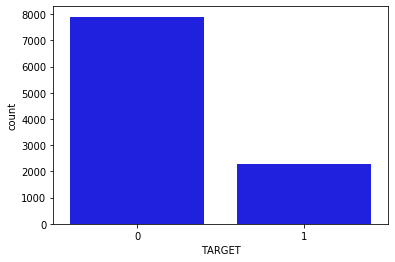

In [57]:
sns.countplot(x="TARGET",data=train,color="b")


In [33]:
train['ft_22_categ'].describe()

count    3761.000000
mean     1967.770540
std        44.340591
min      1545.000000
25%      1960.000000
50%      1978.000000
75%      1995.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [34]:
train['superficief'].describe()

count     4814.000000
mean      2329.679892
std       2724.987482
min         15.000000
25%        650.000000
50%       1388.000000
75%       3000.000000
max      30745.000000
Name: superficief, dtype: float64

In [35]:
train['superficief']=train['superficief'].interpolate(method='linear',limit_direction='forward')

In [36]:
train['ft_22_categ']=train['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [37]:
train['superficief'].describe()

count     4885.000000
mean      2332.146571
std       2718.987082
min         15.000000
25%        650.000000
50%       1390.000000
75%       3000.000000
max      30745.000000
Name: superficief, dtype: float64

In [38]:
train['ft_22_categ'].describe()

count    4885.000000
mean     1967.745036
std        41.950807
min      1545.000000
25%      1960.000000
50%      1976.000000
75%      1991.500000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [56]:
train['ft_5_categ'].describe()

count     10202
unique        4
top           V
freq       7024
Name: ft_5_categ, dtype: object

In [58]:
train_ce = train.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['ft_5_categ'])
df_binary = encoder.fit_transform(train_ce)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ', 'ft_7_categ',
       'ft_8_categ', 'ft_9_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ',
       'ft_13_categ', 'ft_14_categ', 'ft_15_categ', 'ft_16_categ',
       'ft_17_categ', 'ft_18_categ', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee',
       'TARGET'],
      dtype='object')

In [59]:
encoder = ce.BinaryEncoder(cols=['ft_6_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee', 'TARGET'],
      dtype='object')

In [60]:
encoder = ce.BinaryEncoder(cols=['ft_7_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [61]:
encoder = ce.BinaryEncoder(cols=['ft_8_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [62]:
encoder = ce.BinaryEncoder(cols=['ft_9_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [63]:
encoder = ce.BinaryEncoder(cols=['ft_10_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [64]:
encoder = ce.BinaryEncoder(cols=['ft_11_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [65]:
encoder = ce.BinaryEncoder(cols=['ft_12_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [66]:
encoder = ce.BinaryEncoder(cols=['ft_13_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [67]:
encoder = ce.BinaryEncoder(cols=['ft_14_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [68]:
encoder = ce.BinaryEncoder(cols=['ft_15_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,V,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,N,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,V,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,N,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,N,base,2,1754.0,3,1960.0,0,0,64445,0


In [69]:
encoder = ce.BinaryEncoder(cols=['ft_16_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary.columns

Index(['login', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0',
       'ft_5_categ_1', 'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1',
       'ft_6_categ_2', 'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2',
       'ft_8_categ_0', 'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0',
       'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1',
       'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2',
       'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0',
       'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1',
       'ft_14_categ_2', 'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_0', 'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ',
       'ft_18_categ', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Insee', 'TARGET'],
      dtype='object')

In [70]:
encoder = ce.BinaryEncoder(cols=['ft_17_categ'])
df_binary = encoder.fit_transform(df_binary)
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_17_categ_2,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,0,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,0,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,0,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,based,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,0,base,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,1,base,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,base,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,0,base,2,1754.0,3,1960.0,0,0,64445,0


In [74]:
#encoder = ce.BinaryEncoder(cols=['ft_18_categ'])
#df_binary = encoder.fit_transform(df_binary)
df_binary


,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,0,1,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,0,1,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,0,1,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,0,1,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,0,1,2,1050.0,2,1972.0,0,4,59340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,1,0,2,550.0,2,1960.0,0,0,76217,0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,1,0,2,5580.0,2,2008.0,0,4,78073,0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,1,0,2,750.0,4,NaN,0,0,6029,0
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,1,0,2,1754.0,3,1960.0,0,0,64445,0


In [75]:
df_binary['ft_23_categ'].replace(to_replace = 'V', value = '2.5')
df_binary['ft_23_categ'] = df_binary['ft_23_categ'].replace(to_replace = 'V', value = 0.8)
df_binary['ft_23_categ'].describe()
df_binary['ft_23_categ'].value_counts()

replace_map = {'ft_23_categ': {'0': 0, '0.3': 0.3, '0.6': 0.6, '0.8': 0.8,
                                  '1': 1, '2': 2, '1.5': 1.5}}

df_binary['ft_23_categ'].replace(replace_map, inplace=True)

print(df_binary['ft_23_categ'].value_counts())
df_binary['ft_23_categ'].describe()
#df_binary['ft_23_categ'].astype('float64').dtypes

0      8626
0.3     742
0.6     650
0.8     115
1        44
2        16
1.5       9
Name: ft_23_categ, dtype: int64


count     10202
unique        7
top           0
freq       8626
Name: ft_23_categ, dtype: object

In [92]:
#df_binary_copy = df_binary.copy()
#df_binary['ft_23_categ'] = df_binary['ft_23_categ'].astype('float64').dtypes
#df_binary = df_binary_copy
df_binary.dtypes

login              int64
ft_2_categ         int64
EXPO             float64
ft_4_categ         int64
ft_5_categ_0       int64
ft_5_categ_1       int64
ft_5_categ_2       int64
ft_6_categ_0       int64
ft_6_categ_1       int64
ft_6_categ_2       int64
ft_7_categ_0       int64
ft_7_categ_1       int64
ft_7_categ_2       int64
ft_8_categ_0       int64
ft_8_categ_1       int64
ft_8_categ_2       int64
ft_9_categ_0       int64
ft_9_categ_1       int64
ft_9_categ_2       int64
ft_10_categ_0      int64
ft_10_categ_1      int64
ft_10_categ_2      int64
ft_11_categ_0      int64
ft_11_categ_1      int64
ft_11_categ_2      int64
ft_12_categ_0      int64
ft_12_categ_1      int64
ft_12_categ_2      int64
ft_13_categ_0      int64
ft_13_categ_1      int64
ft_13_categ_2      int64
ft_14_categ_0      int64
ft_14_categ_1      int64
ft_14_categ_2      int64
ft_15_categ_0      int64
ft_15_categ_1      int64
ft_15_categ_2      int64
ft_16_categ_0      int64
ft_16_categ_1      int64
ft_16_categ_2      int64


In [77]:
df_binary['ft_24_categ'].describe()
df_binary['ft_24_categ'].value_counts()
df_binary['ft_24_categ'] = df_binary['ft_24_categ'].replace(to_replace = '>=10', value = 10)
df_binary['ft_24_categ'] = df_binary['ft_24_categ'].replace(to_replace = '> = 10', value = 10)
df_binary['ft_24_categ'].describe()



count     10202
unique       11
top           0
freq       5767
Name: ft_24_categ, dtype: object

In [78]:
#df_binary = df_binary.convert_objects(convert_numeric=True)
df_binary = df_binary.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_binary['ft_23_categ'].describe()

count    10202.000000
mean         0.077838
std          0.207878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ft_23_categ, dtype: float64

In [79]:
df_binary['ft_24_categ'].describe()

count    10202.000000
mean         1.881298
std          2.451635
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         10.000000
Name: ft_24_categ, dtype: float64

In [80]:
df_binary_copy = df_binary.copy()

In [115]:
df_binary['Difference'] = df_binary['ft_2_categ'] - df_binary['ft_22_categ']

In [116]:
nullData = df_binary.isnull().sum()
nullData

ft_2_categ       0
EXPO             0
ft_4_categ       0
ft_5_categ_0     0
ft_5_categ_1     0
ft_5_categ_2     0
ft_6_categ_0     0
ft_6_categ_1     0
ft_6_categ_2     0
ft_7_categ_0     0
ft_7_categ_1     0
ft_7_categ_2     0
ft_8_categ_0     0
ft_8_categ_1     0
ft_8_categ_2     0
ft_9_categ_0     0
ft_9_categ_1     0
ft_9_categ_2     0
ft_10_categ_0    0
ft_10_categ_1    0
ft_10_categ_2    0
ft_11_categ_0    0
ft_11_categ_1    0
ft_11_categ_2    0
ft_12_categ_0    0
ft_12_categ_1    0
ft_12_categ_2    0
ft_13_categ_0    0
ft_13_categ_1    0
ft_13_categ_2    0
ft_14_categ_0    0
ft_14_categ_1    0
ft_14_categ_2    0
ft_15_categ_0    0
ft_15_categ_1    0
ft_15_categ_2    0
ft_16_categ_0    0
ft_16_categ_1    0
ft_16_categ_2    0
ft_17_categ_0    0
ft_17_categ_1    0
ft_17_categ_2    0
ft_18_categ_0    0
ft_18_categ_1    0
ft_18_categ_2    0
ft_18_categ_3    0
ft_19_categ      0
superficief      0
ft_21_categ      0
ft_22_categ      0
ft_23_categ      0
ft_24_categ      0
TARGET      

In [90]:
df_binary['ft_23_categ']=df_binary['ft_23_categ'].interpolate(method='linear',limit_direction='forward')
df_binary['ft_23_categ'].describe()

count    10202.000000
mean         0.077838
std          0.207878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ft_23_categ, dtype: float64

In [93]:
df_binary['superficief']=df_binary['superficief'].interpolate(method='linear',limit_direction='forward')
df_binary['superficief'].describe()

count    10202.000000
mean      1815.405607
std       2262.915555
min          1.000000
25%        501.000000
50%       1005.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

In [95]:
df_binary['ft_22_categ']=df_binary['ft_22_categ'].interpolate(method='linear',limit_direction='forward')
df_binary['ft_22_categ'].describe()

count    10202.000000
mean      1965.064693
std         32.704416
min       1545.000000
25%       1960.000000
50%       1970.000000
75%       1980.000000
max       2016.000000
Name: ft_22_categ, dtype: float64

In [96]:
df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,2,1351.0,4,2012.000000,0.0,2,65440.0,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,1,2,1972.0,2,1980.000000,0.0,0,14341.0,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,1,2,1630.0,4,1977.333333,0.0,0,75109.0,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,1,2,532.0,3,1974.666667,0.0,0,92004.0,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,2,1050.0,2,1972.000000,0.0,4,59340.0,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,0,2,550.0,2,1960.000000,0.0,0,76217.0,0,52.0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,0,2,5580.0,2,2008.000000,0.0,4,78073.0,0,6.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,2,750.0,4,1984.000000,0.0,0,6029.0,0,NaN
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,0,2,1754.0,3,1960.000000,0.0,0,64445.0,0,55.0


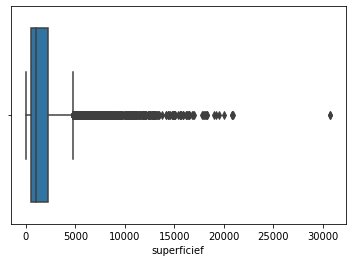

In [97]:
sns.boxplot(x = df_binary['superficief'])

In [85]:
df_binary[df_binary.superficief > 11000]


,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
70,15816,2013,1.0,0,0,0,1,0,0,1,...,0,2,19195.0,2,1970.0,0.0,6,60057.0,1,43.0
127,18463,2014,1.0,1,0,0,1,0,0,1,...,0,2,12582.0,3,1970.0,0.0,8,92023.0,1,44.0
139,3901,2015,1.0,0,0,0,1,0,0,1,...,1,2,11380.0,4,1980.0,0.0,7,6104.0,0,35.0
168,15873,2013,1.0,1,0,0,1,0,0,1,...,0,2,14120.0,3,1980.0,0.0,8,33063.0,0,33.0
243,6938,2013,1.0,1,0,0,1,0,1,0,...,1,2,16859.0,2,1980.0,0.0,0,13213.0,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,3257,2012,1.0,0,0,0,1,0,1,0,...,0,2,13777.0,1,1980.0,0.0,0,86194.0,1,32.0
9810,10894,2012,1.0,0,1,0,0,0,1,0,...,0,2,30745.0,2,1980.0,0.0,0,83009.0,1,32.0
9880,16931,2016,1.0,0,0,0,1,0,1,1,...,0,2,12900.0,4,1970.0,0.0,5,6083.0,1,46.0
10029,14979,2014,1.0,0,0,0,1,0,1,1,...,1,2,12500.0,2,1970.0,0.6,4,13209.0,1,44.0


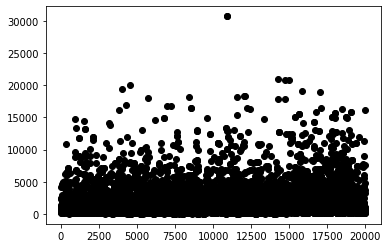

In [86]:
plt.plot(df_binary['login'], df_binary['superficief'], 'o', color='black');


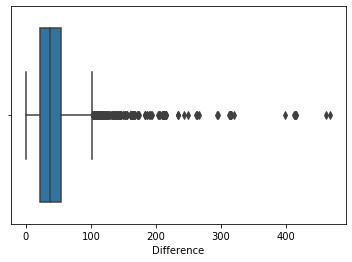

In [67]:
sns.boxplot(x = df_binary['Difference'])

In [87]:
df_binary_copy2 = df_binary.copy()
df_binary_copy2

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
0,18702,2014,1.000000,0,0,0,1,0,0,1,...,1,2,1351.0,4,2012.0,0.0,2,65440.0,0,2.0
1,3877,2014,1.000000,0,0,0,1,0,1,0,...,1,2,1972.0,2,1980.0,0.0,0,14341.0,1,34.0
2,4942,2013,1.000000,1,0,0,1,0,1,0,...,1,2,1630.0,4,NaN,0.0,0,75109.0,0,NaN
3,13428,2013,0.246575,0,0,1,0,0,1,0,...,1,2,532.0,3,NaN,0.0,0,92004.0,0,NaN
4,17137,2015,1.000000,0,0,0,1,0,0,1,...,1,2,1050.0,2,1972.0,0.0,4,59340.0,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10224,2710,2012,1.000000,0,0,0,1,0,1,0,...,0,2,550.0,2,1960.0,0.0,0,76217.0,0,52.0
10225,16868,2014,0.000000,1,0,0,1,0,1,1,...,0,2,5580.0,2,2008.0,0.0,4,78073.0,0,6.0
10226,8499,2015,0.246575,0,0,0,1,0,1,0,...,0,2,750.0,4,NaN,0.0,0,6029.0,0,NaN
10227,5319,2015,1.000000,0,1,0,0,0,1,0,...,0,2,1754.0,3,1960.0,0.0,0,64445.0,0,55.0


In [69]:
x = df_binary[df_binary.Difference > 110]
x[x.TARGET == 1]

#temp = train[train.ft_22_categ == 1960]
#temp = temp[temp.TARGET == 0]
#for i in x.login:
#    df_binary = df_binary[df_binary.login != i]

#df_binary

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,...,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET,Difference
145,9008,2014,1.000000,0,0,0,1,0,0,1,...,0,2,2973.0,4,1850.0,0.0,6,75106.0,1,164.0
148,9799,2014,1.000000,0,0,0,1,0,0,1,...,1,2,318.0,4,1900.0,0.0,4,6004.0,1,114.0
188,18355,2012,0.751366,1,0,0,1,0,0,1,...,1,2,2205.0,3,1895.0,0.0,7,94067.0,1,117.0
286,3864,2015,1.000000,0,0,0,1,0,0,1,...,1,2,2450.0,3,1870.0,0.0,4,54395.0,1,145.0
305,7222,2015,1.000000,0,0,0,1,0,0,1,...,1,2,2100.0,2,1900.0,0.3,8,13207.0,1,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,4818,2012,1.000000,1,0,0,1,0,1,1,...,0,2,858.0,3,1900.0,0.0,4,92049.0,1,112.0
9928,13598,2013,1.000000,0,0,0,1,0,1,1,...,1,2,1800.0,3,1900.0,0.6,4,59163.0,1,113.0
10019,16578,2013,1.000000,1,0,0,1,0,1,1,...,1,1,741.0,2,1900.0,0.0,4,78551.0,1,113.0
10031,6331,2012,1.000000,0,0,0,1,0,1,1,...,1,2,436.0,2,1900.0,0.0,4,26362.0,1,112.0


In [98]:
backUp3 = df_binary

In [99]:
names = df_binary.columns# Create the Scaler object
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_binary)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df
df_binary = df_binary.drop(['login'], axis = 1)


In [100]:
df_binary = df_binary.drop(['Insee'], axis = 1)


In [120]:
#tempdf = df_binary.copy()
#tempdf = tempdf.drop(['TARGET'], axis =1)
target = tempdf.TARGET
target

0        0
1        1
2        0
3        0
4        0
        ..
10224    0
10225    0
10226    0
10227    0
10228    1
Name: TARGET, Length: 10202, dtype: int64

In [128]:
df_binary = tempdf

In [129]:
names = df_binary.columns# Create the Scaler object
#names = np.array(names)
#names = np.delete(names,52)
names

scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_binary)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,TARGET,Difference
0,0.255461,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,-3.351509,1.140551,-0.189318,...,-1.712578,2.194634,0.256331,-0.205235,1.836011,1.435207,-0.374457,0.048420,-0.538748,-1.421468
1,0.255461,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,0.069204,-0.246366,0.456698,-0.374457,-0.767402,1.856156,-0.444984
2,-0.468488,0.365899,1.601838,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,-0.081936,1.836011,0.375156,-0.374457,-0.767402,-0.538748,-0.394126
3,-0.468488,-2.919516,-0.624283,-0.585424,4.095549,-1.497270,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,-0.567175,0.794822,0.293613,-0.374457,-0.767402,-0.538748,-0.312752
4,0.979411,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,-3.351509,1.140551,-0.189318,...,-1.712578,2.194634,0.256331,-0.338255,-0.246366,0.212071,-0.374457,0.864242,-0.538748,-0.170349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197,-1.192437,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.559220,-0.246366,-0.154870,-0.374457,-0.767402,-0.538748,0.104287
10198,0.255461,-3.994743,1.601838,-0.585424,-0.244168,0.667882,-0.009901,0.298373,1.140551,-0.189318,...,0.583915,-0.455657,0.256331,1.663685,-0.246366,1.312893,-0.374457,0.864242,-0.538748,-1.299407
10199,0.979411,-2.919516,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.470834,1.836011,0.579012,-0.374457,-0.767402,-0.538748,-0.536530
10200,0.979411,0.365899,-0.624283,1.708162,-0.244168,-1.497270,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.027137,0.794822,-0.154870,-0.374457,-0.767402,-0.538748,0.195833


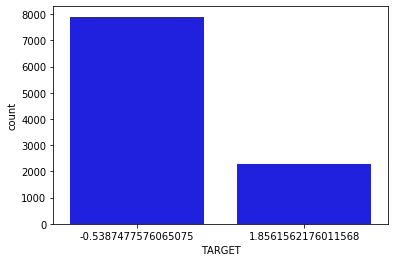

In [130]:
sns.countplot(x="TARGET",data=scaled_df,color="b")

In [131]:
scaled_df['TARGET'] = scaled_df['TARGET'].replace(to_replace = -0.5387477576065075, value = 0)
scaled_df['TARGET'] = scaled_df['TARGET'].replace(to_replace = 1.8561562176011568, value = 1)
#scaled_df['TARGET'] = scaled_df['TARGET'].astype('int64').dtypes
scaled_df['TARGET'] = scaled_df['TARGET'].astype('Int64')
scaled_df['TARGET']

0        0
1        1
2        0
3        0
4        0
        ..
10197    0
10198    0
10199    0
10200    0
10201    1
Name: TARGET, Length: 10202, dtype: Int64

In [132]:
scaled_df = scaled_df.reindex(columns=['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_0',
       'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0', 'ft_9_categ_1',
       'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1', 'ft_10_categ_2',
       'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference', 'TARGET'])

scaled_df

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ_0,ft_5_categ_1,ft_5_categ_2,ft_6_categ_0,ft_6_categ_1,ft_6_categ_2,ft_7_categ_0,...,ft_18_categ_2,ft_18_categ_3,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Difference,TARGET
0,0.255461,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,-3.351509,1.140551,-0.189318,...,-1.712578,2.194634,0.256331,-0.205235,1.836011,1.435207,-0.374457,0.048420,-1.421468,0
1,0.255461,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,0.069204,-0.246366,0.456698,-0.374457,-0.767402,-0.444984,1
2,-0.468488,0.365899,1.601838,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,-0.081936,1.836011,0.375156,-0.374457,-0.767402,-0.394126,0
3,-0.468488,-2.919516,-0.624283,-0.585424,4.095549,-1.497270,-0.009901,0.298373,-0.876769,-0.189318,...,-1.712578,2.194634,0.256331,-0.567175,0.794822,0.293613,-0.374457,-0.767402,-0.312752,0
4,0.979411,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,-3.351509,1.140551,-0.189318,...,-1.712578,2.194634,0.256331,-0.338255,-0.246366,0.212071,-0.374457,0.864242,-0.170349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197,-1.192437,0.365899,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.559220,-0.246366,-0.154870,-0.374457,-0.767402,0.104287,0
10198,0.255461,-3.994743,1.601838,-0.585424,-0.244168,0.667882,-0.009901,0.298373,1.140551,-0.189318,...,0.583915,-0.455657,0.256331,1.663685,-0.246366,1.312893,-0.374457,0.864242,-1.299407,0
10199,0.979411,-2.919516,-0.624283,-0.585424,-0.244168,0.667882,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.470834,1.836011,0.579012,-0.374457,-0.767402,-0.536530,0
10200,0.979411,0.365899,-0.624283,1.708162,-0.244168,-1.497270,-0.009901,0.298373,-0.876769,-0.189318,...,0.583915,-0.455657,0.256331,-0.027137,0.794822,-0.154870,-0.374457,-0.767402,0.195833,0


In [133]:
sdf = scaled_df.copy()
#sdf
sdf = sdf.drop(['TARGET'], axis = 1)
sdf
target = scaled_df['TARGET'].copy()
target

0        0
1        1
2        0
3        0
4        0
        ..
10197    0
10198    0
10199    0
10200    0
10201    1
Name: TARGET, Length: 10202, dtype: Int64

/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[9.83230502e-02 6.77317557e-02 2.46276026e-02 1.32128333e-03
 1.64492652e-03 2.82817208e-03 1.27066294e-04 6.06559182e-04
 5.18716711e-04 2.47767702e-03 1.45004254e-02 5.02912564e-03
 0.00000000e+00 4.89457215e-04 5.95545521e-04 3.47942881e-06
 4.75115320e-04 2.40295973e-04 2.64389006e-04 1.54612781e-04
 5.08505151e-04 5.59080235e-04 1.41843847e-04 4.52286216e-04
 9.33141021e-04 4.90969391e-03 2.16456215e-03 2.34576292e-03
 5.20601487e-03 1.97037527e-03 2.01591863e-03 3.45377241e-03
 1.82728926e-03 0.00000000e+00 5.36409140e-04 2.63652487e-04
 0.00000000e+00 4.22993908e-04 2.67452445e-04 5.23422266e-04
 7.41503410e-04 9.96611821e-04 0.00000000e+00 1.08185302e-02
 1.04018801e-02 6.34858658e-03 7.50855493e-03 4.28829241e-01
 5.32139000e-02 1.49104864e-01 2.70139824e-02 5.45609140e-02]


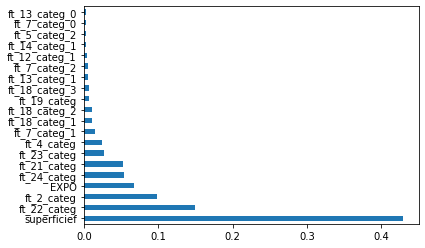

In [134]:
#data = pd.read_csv("D://Blogs//train.csv")
x1 = scaled_df.iloc[:,0:52]  #independent columns
y1 = scaled_df.iloc[:,-1]    #target column i.e price range
y1 = y1.astype('int64') 
model = ExtraTreesClassifier()
model.fit(x1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

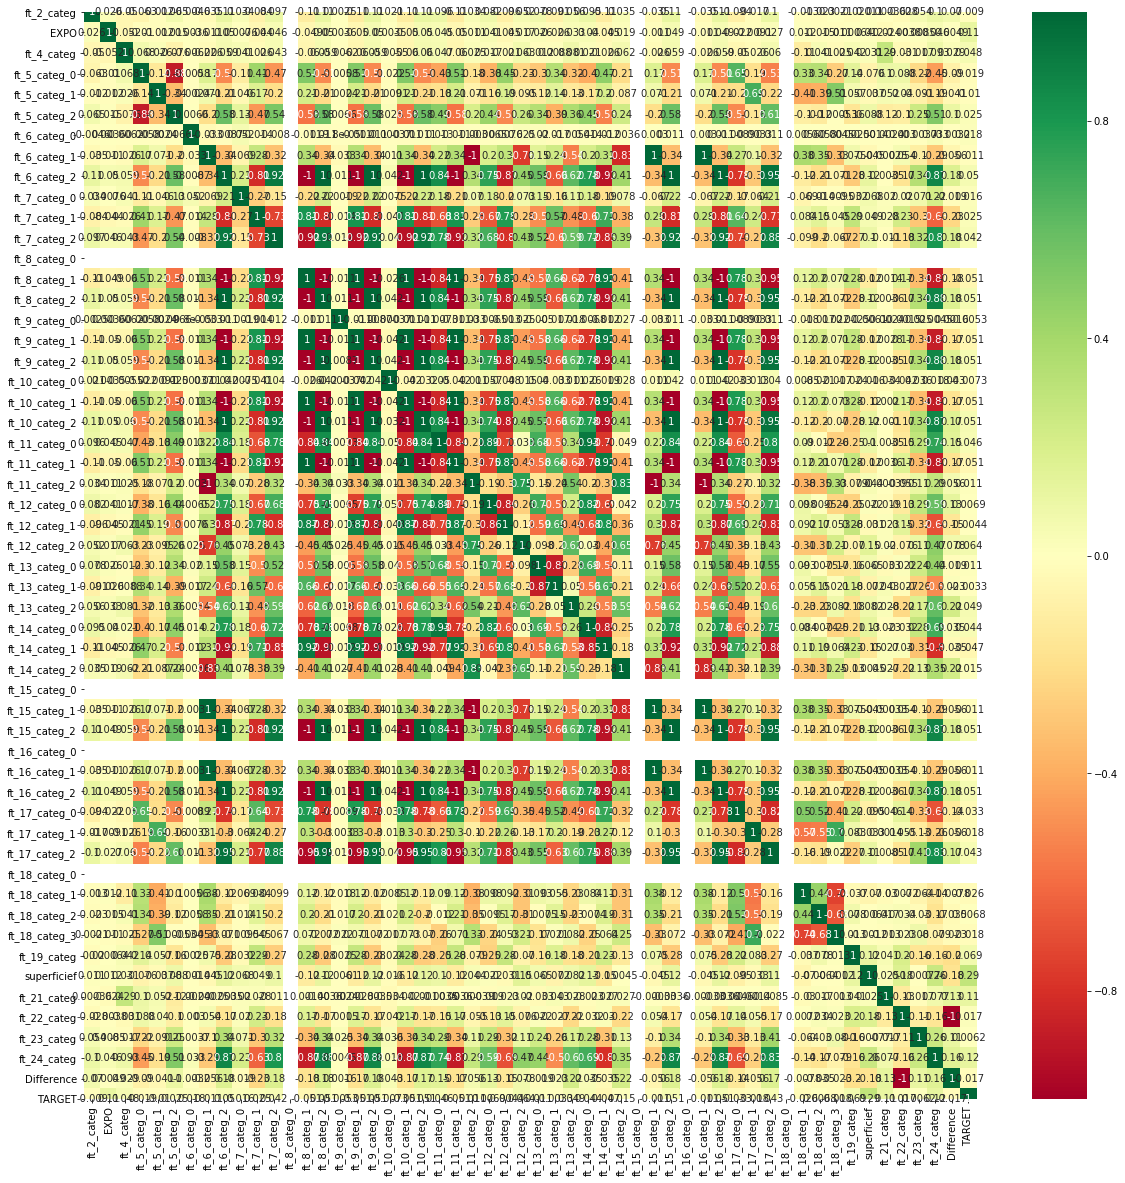

In [135]:
#data = pd.read_csv("D://Blogs//train.csv")
X = scaled_df.iloc[:,0:52]  #independent columns
y = scaled_df.iloc[:,-1] #target column i.e price range
#get correlations of each features in dataset
y = y.astype('int64')

corrmat = scaled_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(scaled_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#print(g)

In [136]:
sdf.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_0',
       'ft_8_categ_1', 'ft_8_categ_2', 'ft_9_categ_0', 'ft_9_categ_1',
       'ft_9_categ_2', 'ft_10_categ_0', 'ft_10_categ_1', 'ft_10_categ_2',
       'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_0', 'ft_15_categ_1', 'ft_15_categ_2', 'ft_16_categ_0',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_0', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [137]:
data_final_vars = sdf.columns.values.tolist()
y = ['TARGET']
target = target.astype('int64')
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(sdf, target.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

[False  True False False False False False  True False  True False  True
 False False False False False  True False False False False False False
 False False False False False False False False False False  True False
 False  True False False False False False False False False False  True
  True False False  True False]
[27  1 32  6  7  5 16  1  3  1 17  1 43  4  8 23 12  1 38 36 37 15 29  2
 35 20 39 11 10 31 33 13 30 41  1 21 42  1 22 24 25 14 44 19 40 18  9  1
  1 28 26  1 34]


In [138]:
cols = ['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
        'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
        'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2','ft_8_categ_1', 
        'ft_8_categ_2', 'ft_9_categ_1','ft_9_categ_2', 'ft_10_categ_0',
        'ft_10_categ_1', 'ft_10_categ_2',
        'ft_11_categ_0', 'ft_11_categ_1', 'ft_11_categ_2', 'ft_12_categ_0',
       'ft_12_categ_1', 'ft_12_categ_2', 'ft_13_categ_0', 'ft_13_categ_1',
       'ft_13_categ_2', 'ft_14_categ_0', 'ft_14_categ_1', 'ft_14_categ_2',
       'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2',
       'ft_18_categ_3', 'ft_19_categ', 'superficief', 'ft_21_categ',
       'ft_22_categ', 'ft_23_categ', 'ft_24_categ', 'Difference']
x = sdf[cols]
y = target

In [139]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ_0', 'ft_5_categ_1',
       'ft_5_categ_2', 'ft_6_categ_0', 'ft_6_categ_1', 'ft_6_categ_2',
       'ft_7_categ_0', 'ft_7_categ_1', 'ft_7_categ_2', 'ft_8_categ_1',
       'ft_8_categ_2', 'ft_9_categ_1', 'ft_9_categ_2', 'ft_10_categ_0',
       'ft_10_categ_1', 'ft_10_categ_2', 'ft_11_categ_0', 'ft_11_categ_1',
       'ft_11_categ_2', 'ft_12_categ_0', 'ft_12_categ_1', 'ft_12_categ_2',
       'ft_13_categ_0', 'ft_13_categ_1', 'ft_13_categ_2', 'ft_14_categ_0',
       'ft_14_categ_1', 'ft_14_categ_2', 'ft_15_categ_1', 'ft_15_categ_2',
       'ft_16_categ_1', 'ft_16_categ_2', 'ft_17_categ_0', 'ft_17_categ_1',
       'ft_17_categ_2', 'ft_18_categ_1', 'ft_18_categ_2', 'ft_18_categ_3',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Difference'],
      dtype='object')

In [202]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.601268
         Iterations: 35
                                           Results: Logit
Model:                           Logit                       Pseudo R-squared:            0.130      
Dependent Variable:              TARGET                      AIC:                         5946.3863  
Date:                            2019-11-19 03:14            BIC:                         6180.1676  
No. Observations:                4885                        Log-Likelihood:              -2937.2    
Df Model:                        35                          LL-Null:                     -3377.1    
Df Residuals:                    4849                        LLR p-value:                 4.4216e-162
Converged:                       0.0000                      Scale:                       1.0000     
No. Iterations:                  35.0000                                                             
------------------------------------------------------------

/home/prajj/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/prajj/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/prajj/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [140]:
cols = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1']

col1 = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1','ft_12_categ_1','ft_4_categ','ft_7_categ_2',
       'ft_18_categ_2','ft_18_categ_3','ft_12_categ_1']

col2 = ['superficief','EXPO','ft_21_categ','ft_24_categ',
       'ft_18_categ_1','ft_10_categ_1','ft_19_categ','ft_13_categ_1'
       ]

x = sdf[col1]
y = target

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/prajj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.6f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.789285


In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2314,   69],
       [ 576,  102]])

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(NormalizedGini(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2383
           1       0.60      0.15      0.24       678

    accuracy                           0.79      3061
   macro avg       0.70      0.56      0.56      3061
weighted avg       0.76      0.79      0.74      3061



NameError: name 'NormalizedGini' is not defined

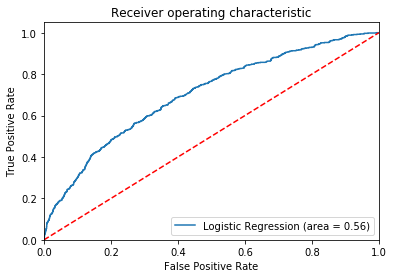

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [150]:

def gini(list_of_values):
    sorted_list = sorted(list(list_of_values))
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2
    return(fair_area - area) / fair_area

def normalized_gini(y_pred, y):
    normalized_gini = gini(y_pred)/gini(y)
    return normalized_gini
    

#predicted_y = np.random.randint(100, size = 1000)
#desired_y = np.random.randint(100, size = 1000)

print (normalized_gini(y_pred, y_test))

1.2127570289550986


In [162]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [164]:
gini_normalized(y_test,y_pred)

0.13864182997312566